# Análisis y Visualización de Datos <font color='Teal'>Cardiotocografía (CTG)</font>

--------------------------------------------------------------------


## <font color='violet'>Equipo 1 - Práctica 3 </font>


* Aura de la Garza Garcia

* Bonifacio Becerril Garcia

* Guillermo Armando Lopez Ayala

* Gabriela Fuentes Zaldivar

## <font color='violet'>OBJETIVO</font>

Hacer tratamiento y limpieza del dataset de [cardiotocografia](https://www.kaggle.com/code/akshat0007/cardiotocology/data), y posteriormente, se presentara un reporte y análisis de nuestras observaciones al visualizar este dataset. 

## <font color='violet'>1. Preprocesamiento de Datos</font>

In [36]:
# Importamos librerias necesarias
import pandas as pd

# Importamos modulos para limpieza y tratamiento de datos
from preprocesamiento import clean_ctg_dataframe
from categorizacion import resumen_dataframe

# Importamos modulos para crear graficos
from plots.histograma import create_histogram_plot
from plots.densidad import grafico_densidad_clases, grafico_densidad_seaborn, grafico_violin, grafico_serie_temporal
from plots.boxplot import create_boxplot


# Leemos el dataset de cardiotogografia
df = pd.read_csv('CTG.csv')

ImportError: cannot import name 'create_boxplot' from 'plots.boxplot' (c:\Users\Aura De La Garza G\OneDrive\Documentos\practica_3\ctg_viz\plots\boxplot.py)

In [8]:
# Observamos nuestro dataframe
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [9]:
# Obtenemos los valores nulos.
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

FileName    0.001409
Date        0.001409
SegFile     0.001409
b           0.001409
e           0.001409
LBE         0.001409
LB          0.001409
AC          0.001409
Max         0.001409
Nmax        0.001409
Mode        0.001409
Nzeros      0.001409
Width       0.001409
Min         0.001409
AD          0.001409
E           0.001409
D           0.001409
C           0.001409
B           0.001409
A           0.001409
Tendency    0.001409
Variance    0.001409
Median      0.001409
Mean        0.001409
FS          0.001409
SUSP        0.001409
DE          0.001409
LD          0.001409
CLASS       0.001409
NSP         0.001409
UC          0.000939
FM          0.000939
ALTV        0.000939
MLTV        0.000939
ASTV        0.000939
MSTV        0.000939
DR          0.000470
DP          0.000470
DL          0.000470
DS          0.000470
dtype: float64

**Observación:** Podemos notar que ninguna fila poseé más del 20% de valores nulos, por lo cual, esperamos que nuestra función de limpieza de datos no nos elimine ninguna columna. 

Ahora, procedemos a hacer la limpieza y tratamiento de datos usando la función ```clean_ctg_dataframe()``` del módulo **"preprocesamiento"**. Ahora comprobamos que se han eliminado los valores nulos.

In [10]:
# Limpiamos nuestra dataframe original
df_limpia = clean_ctg_dataframe(df)

# Comprobamos que hemos eliminado los valores nulos
df_limpia.isnull().sum().sort_values(ascending=False) / df.shape[0]

FileName    0.0
Date        0.0
SegFile     0.0
b           0.0
e           0.0
LBE         0.0
LB          0.0
AC          0.0
FM          0.0
UC          0.0
ASTV        0.0
MSTV        0.0
ALTV        0.0
MLTV        0.0
DL          0.0
DS          0.0
DP          0.0
DR          0.0
Width       0.0
Min         0.0
Max         0.0
Nmax        0.0
Nzeros      0.0
Mode        0.0
Mean        0.0
Median      0.0
Variance    0.0
Tendency    0.0
A           0.0
B           0.0
C           0.0
D           0.0
E           0.0
AD          0.0
DE          0.0
LD          0.0
FS          0.0
SUSP        0.0
CLASS       0.0
NSP         0.0
dtype: float64

Ahora, procedemos a averiguar cuanta información hemos perdido a raíz de nuestro tratamiento de outliers. 

In [11]:
# Calculamos el porcentaje de informacion resultante al limpiar
print('Porcentaje de Datos restantes post-limpieza: ',(df_limpia.shape[0]/df.shape[0])*100)

Porcentaje de Datos restantes post-limpieza:  71.95866604039455


## <font color='violet'>2. Análisis de Datos</font>

In [12]:
df_categ = resumen_dataframe(df_limpia)
print(df_categ)

     columna  nulos  completitud (%) tipo_dato    min          max  \
0   FileName      0            100.0    object    NaN          NaN   
1       Date      0            100.0    object    NaN          NaN   
2    SegFile      0            100.0    object    NaN          NaN   
3          b      0            100.0   float64    0.0  3296.000000   
4          e      0            100.0   float64  287.0  3599.000000   
5        LBE      0            100.0   float64  106.0   160.000000   
6         LB      0            100.0   float64  106.0   160.000000   
7         AC      0            100.0   float64    0.0    13.000000   
8         FM      0            100.0   float64    0.0   104.000000   
9         UC      0            100.0   float64    0.0    12.000000   
10      ASTV      0            100.0   float64   12.0    83.000000   
11      MSTV      0            100.0   float64    0.2     3.900000   
12      ALTV      0            100.0   float64    0.0    66.000000   
13      MLTV      0 

## <font color='violet'>3. Visualización Interactiva de Datos</font>

### <font color='teal'>3.1. Histogramas</font>

In [13]:
create_histogram_plot(df_limpia, x_col='Nmax')

### <font color='teal'>3.2. Boxplots</font>

In [31]:

# 1. Boxplots simples de 8 variables
g_boxplot = boxplots_multiples(df_limpia, columnas_numericas[:8])
g_boxplot.show()

NameError: name 'boxplots_multiples' is not defined

### <font color='teal'>3.3. Barplots</font>

### <font color='teal'>3.4. Densidades</font>

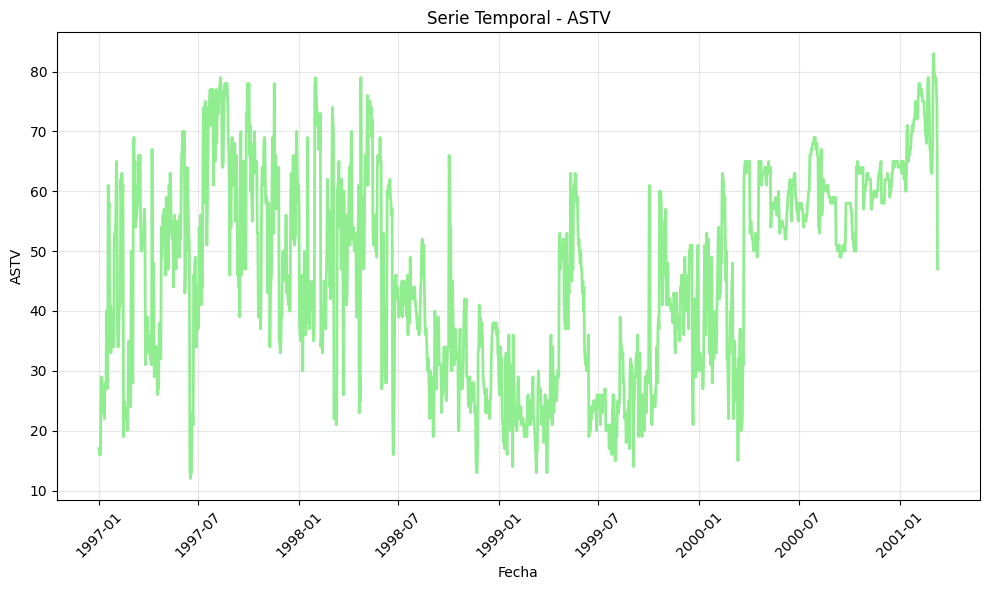

In [22]:
grafico_serie_temporal(df_limpia,'ASTV')

In [25]:
grafico_violin(df_limpia, 'b')

NameError: name 'columna_variable' is not defined

### <font color='teal'>3.1. Heatmap</font>

## <font color='violet'>4. Observaciones y Conclusión</font>